<a href="https://colab.research.google.com/github/alison-rm/trabalho_Titanic/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Dados**

In [4]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explorando os Dados**

In [5]:
df_train['Age'].mean() # Média de Idade Geral

29.69911764705882

In [6]:
df_train.loc[df_train['Sex'] =="female", 'Age'].mean() # Média de Idade Feminino

27.915708812260537

In [7]:
df_train.loc[df_train['Sex'] =="male", 'Age'].mean() # Média de Idade Masculino

30.72664459161148

In [8]:
df_train['Survived'].value_counts() # Quantidade de sobrevivente (GERAL)

0    549
1    342
Name: Survived, dtype: int64

In [9]:
(len(df_train[df_train['Survived'] == 1])/ len(df_train)) * 100.0
## Porcentagem de sobreviventes

38.38383838383838

In [10]:
(len(df_train[df_train['Survived'] == 0])/ len(df_train)) * 100.0
## Porcentagem de não sobreviventes

61.61616161616161

<ipython-input-11-155dd375a2e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap="crest")


<Axes: >

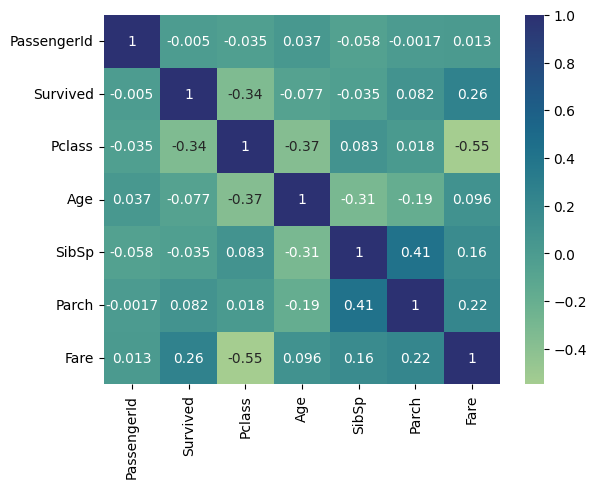

In [11]:
sns.heatmap(df_train.corr(), annot=True, cmap="crest")

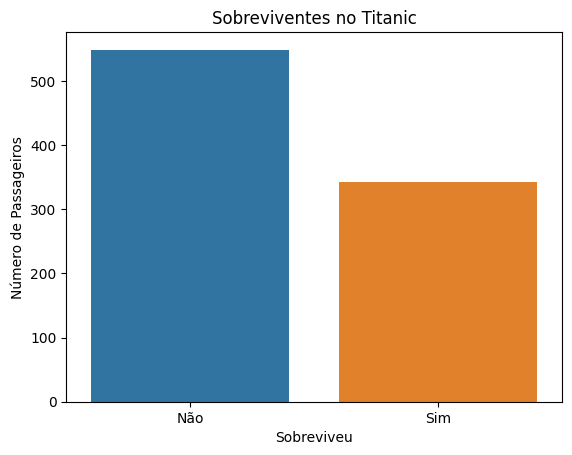

In [ ]:
sns.countplot(x='Survived', data=train_data)
plt.title('Sobreviventes no Titanic')
plt.xlabel('Sobreviveu')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


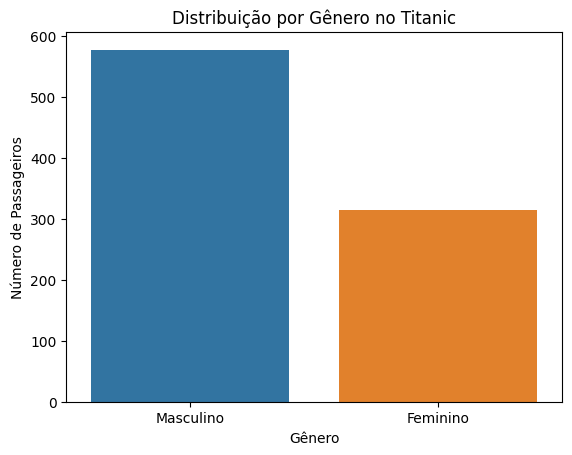

In [ ]:
sns.countplot(x='Sex', data=train_data)
plt.title('Distribuição por Gênero no Titanic')
plt.xlabel('Gênero')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.show()

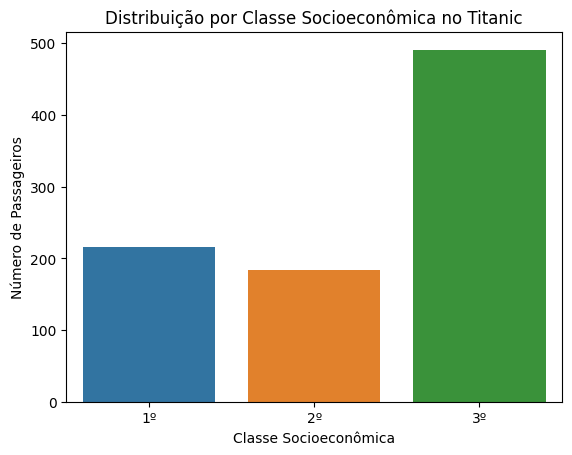

In [ ]:
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribuição por Classe Socioeconômica no Titanic')
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1, 2], ['1º', '2º', '3º'])
plt.show()

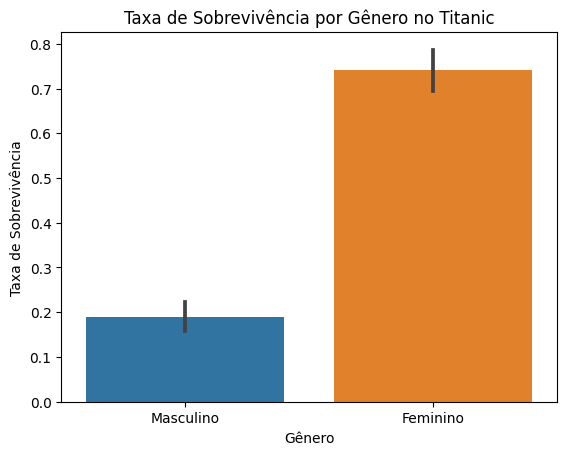

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Taxa de Sobrevivência por Gênero no Titanic')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.show()

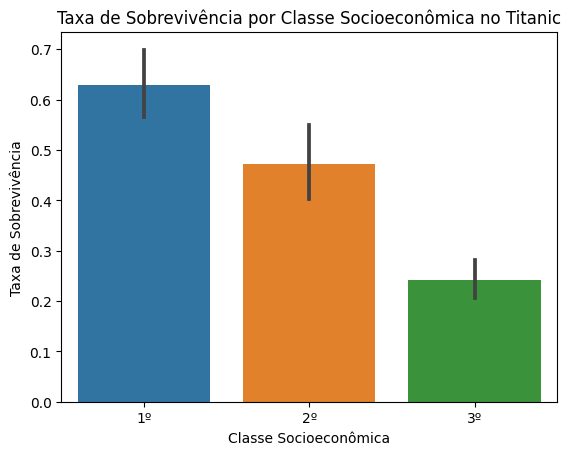

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Taxa de Sobrevivência por Classe Socioeconômica no Titanic')
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1, 2], ['1º', '2º', '3º'])
plt.show()

**Pré-processamento dos Dados**

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

**Análise Estatística**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mean_age_survived = train_data[train_data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = train_data[train_data['Survived'] == 0]['Age'].mean()



<Axes: xlabel='Age', ylabel='Count'>

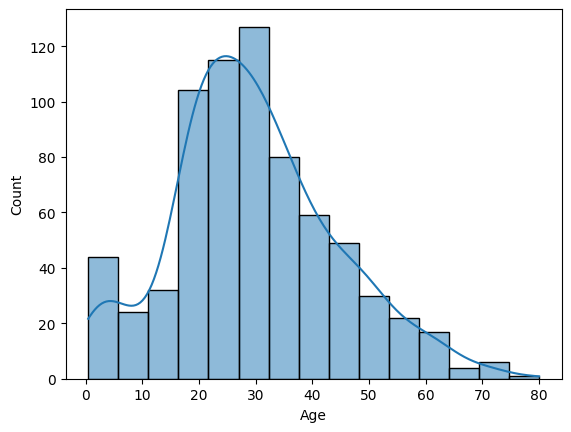

In [12]:
sns.histplot(data=df_train, x='Age', bins=15, kde=True)
# histograma com quantidade de pessoas por faixas de idade

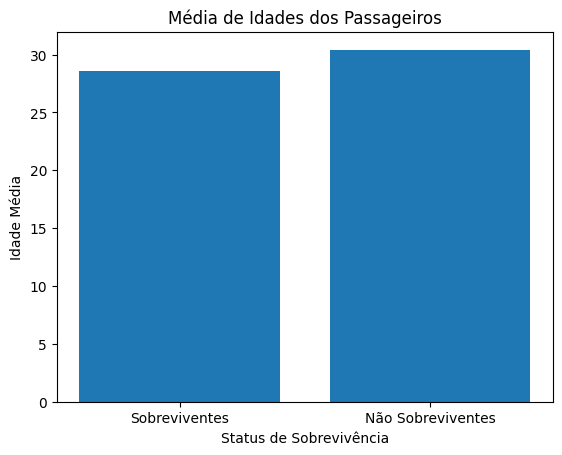

In [ ]:
plt.bar(['Sobreviventes', 'Não Sobreviventes'], [mean_age_survived, mean_age_not_survived])
plt.title('Média de Idades dos Passageiros')
plt.xlabel('Status de Sobrevivência')
plt.ylabel('Idade Média')
plt.show()

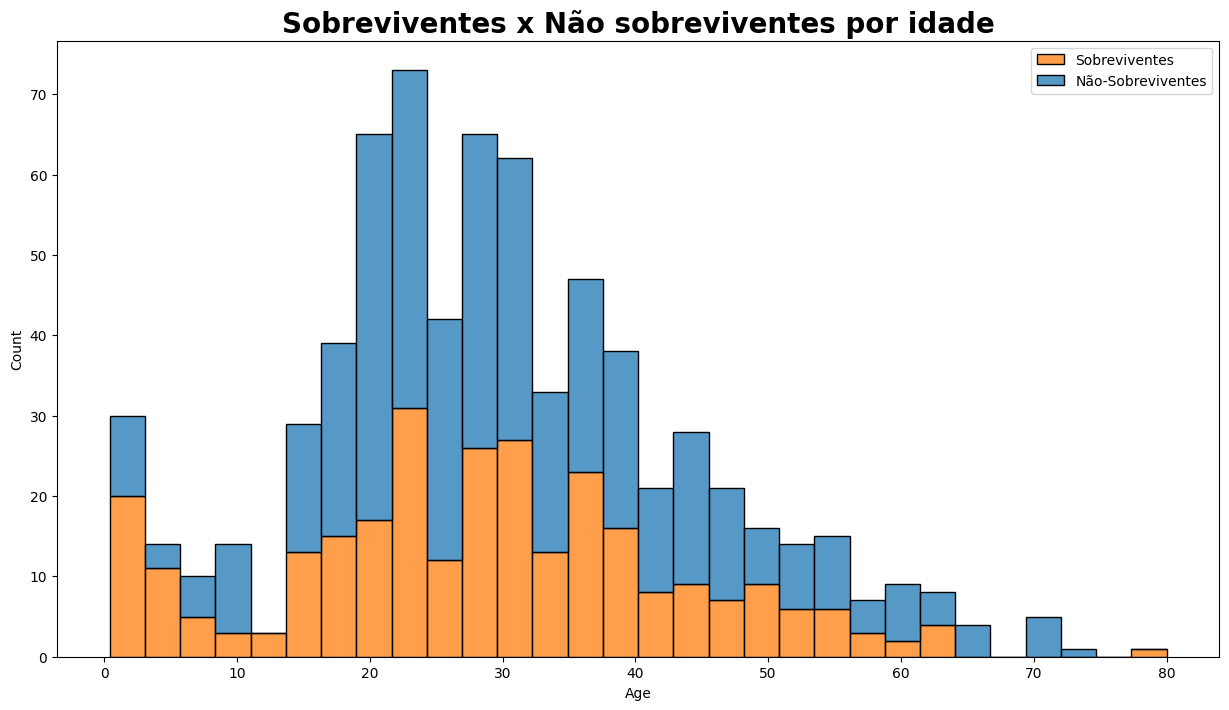

In [14]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', bins=30, )

ax.set_title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

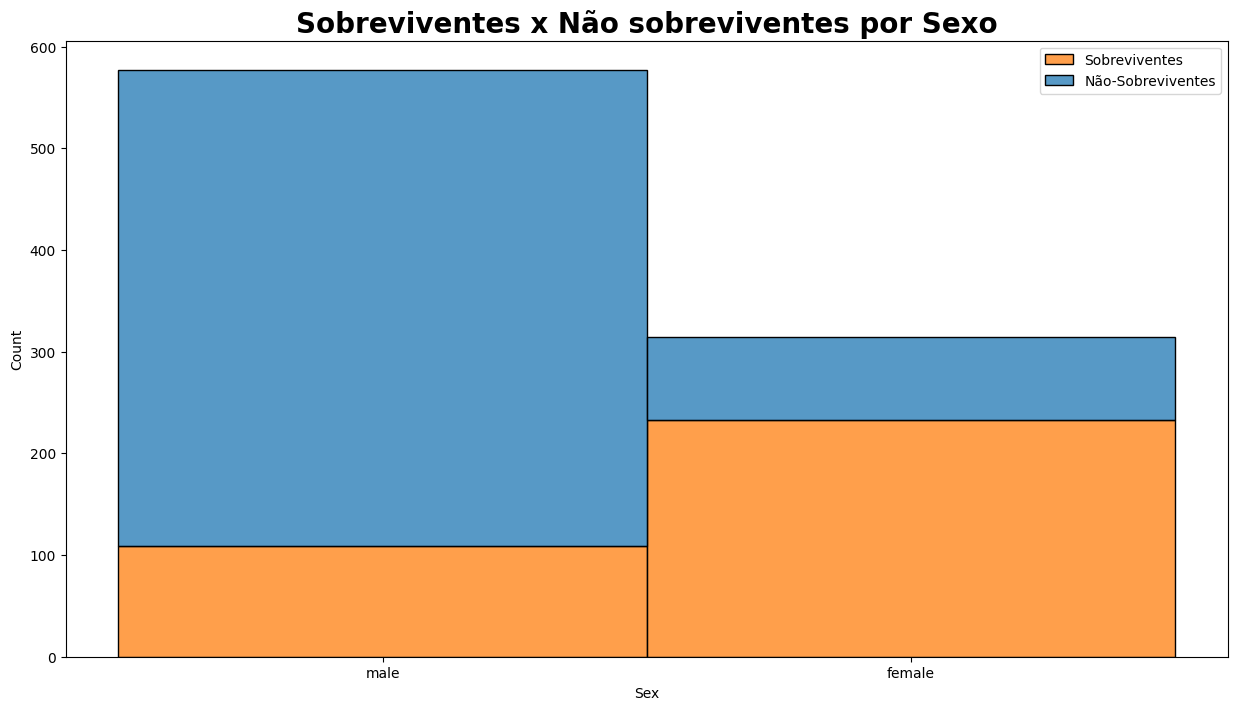

In [15]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Sex', hue='Survived', multiple='stack', bins=30,)

ax.set_title('Sobreviventes x Não sobreviventes por Sexo', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

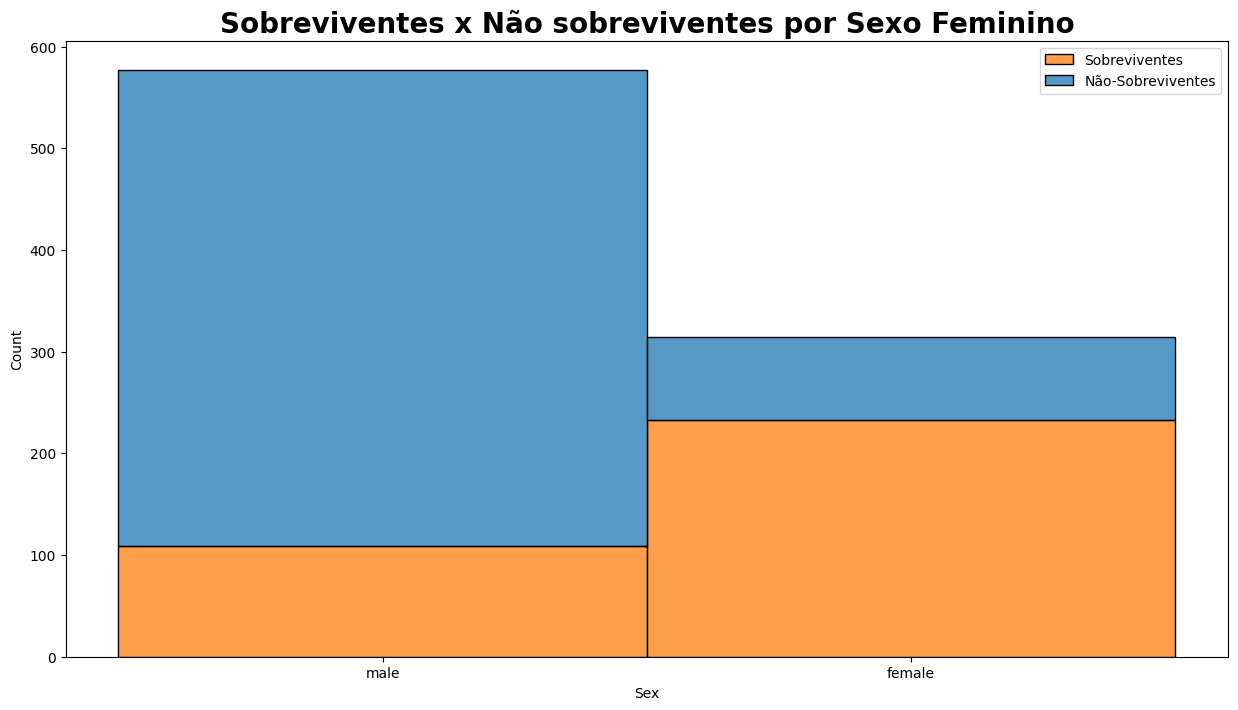

In [18]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Sex', hue='Survived', multiple='stack', bins=30,)

ax.set_title('Sobreviventes x Não sobreviventes por Sexo Feminino', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

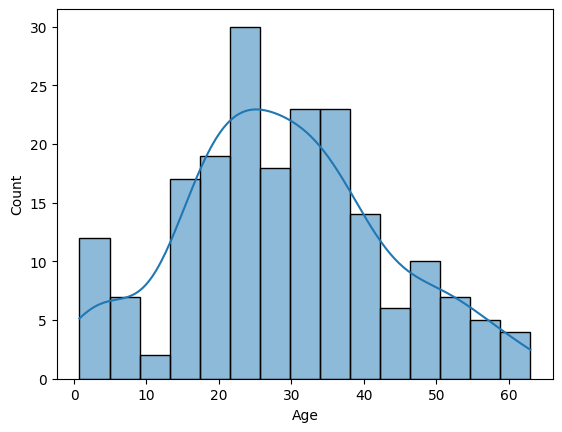

In [48]:
sns.histplot(data=df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female')], x='Age', bins=15, kde=True)
# Dentre as pessoas do sexo feminino, aquelas idade entre 15 e 35 anos tiveram maior indice de sobrevivencia

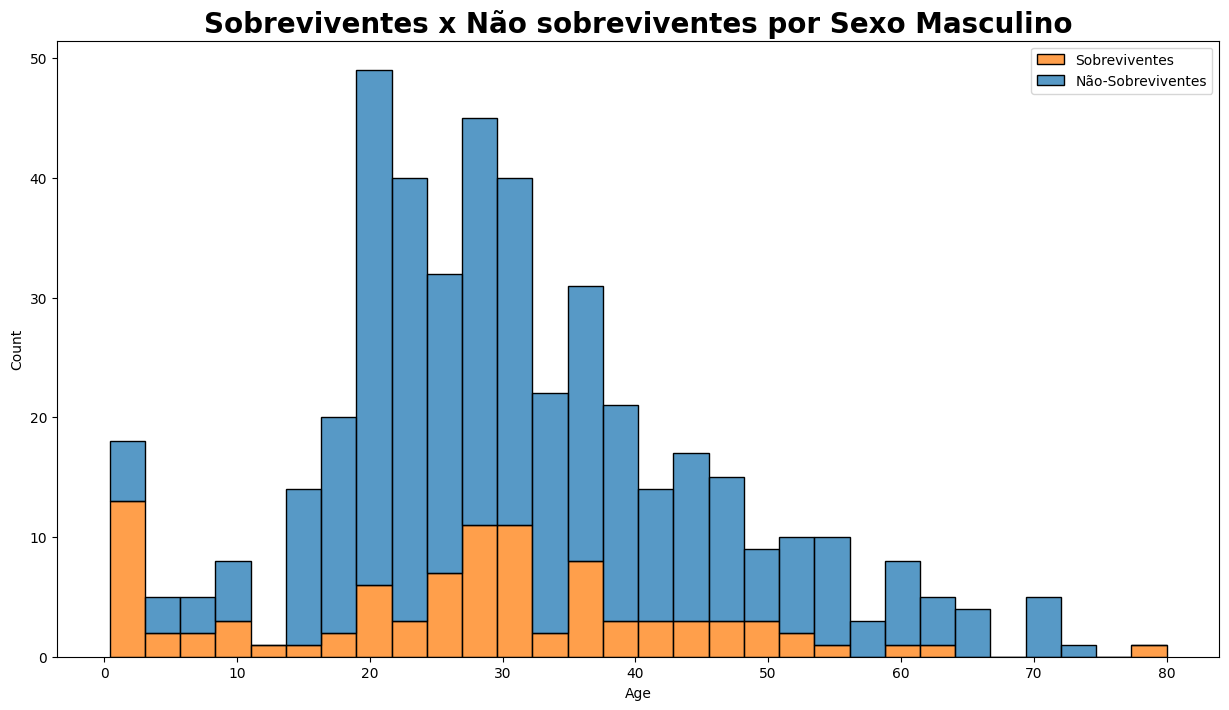

In [19]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train.loc[df_train['Sex'] == 'male'], x='Age', hue='Survived', multiple='stack', bins=30,)

ax.set_title('Sobreviventes x Não sobreviventes por Sexo Masculino', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

In [ ]:
var_fare_survived = train_data[train_data['Survived'] == 1]['Fare'].var()
var_fare_not_survived = train_data[train_data['Survived'] == 0]['Fare'].var()

In [51]:
df_train['Fare'].max() # Maior Tarifa

512.3292

In [52]:
df_train['Fare'].min()  # Menor Tarifa

0.0

In [53]:
def separar_grupos(tarifa):
    if tarifa <= 190:
      return 'Baixa'
    elif tarifa <= 380:
      return 'Média'
    else:
        return 'Alta'

df_train['FareGroup'] = df_train['Fare'].apply(separar_grupos)
df_train['FareGroup'].value_counts()

Baixa    871
Média     17
Alta       3
Name: FareGroup, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

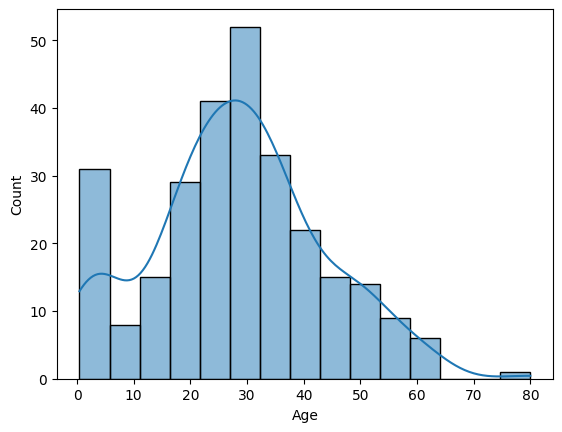

In [54]:
sns.histplot(data=df_train.loc[(df_train['Survived'] == 1) & (df_train['FareGroup'] == 'Baixa')], x='Age', bins=15, kde=True)
# Sobreviventes do grupo de tarifa baixa

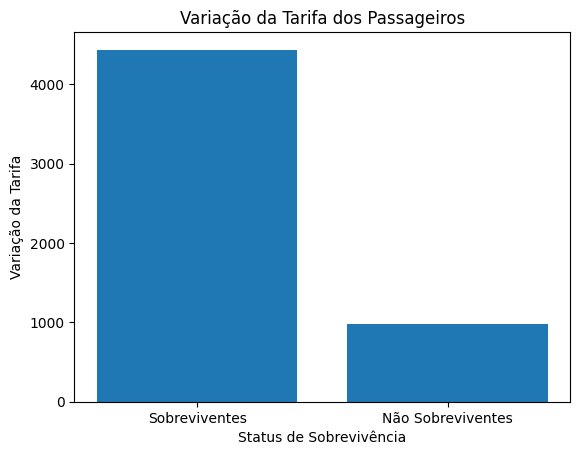

In [ ]:
plt.bar(['Sobreviventes', 'Não Sobreviventes'], [var_fare_survived, var_fare_not_survived])
plt.title('Variação da Tarifa dos Passageiros')
plt.xlabel('Status de Sobrevivência')
plt.ylabel('Variação da Tarifa')
plt.show()

<Axes: xlabel='Sex', ylabel='Count'>

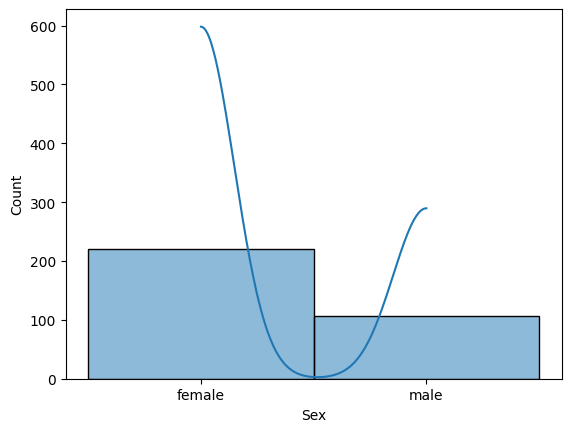

In [55]:
sns.histplot(data=df_train.loc[(df_train['Survived'] == 1) & (df_train['FareGroup'] == 'Baixa')], x='Sex', bins=15, kde=True)
# Sobreviventes do grupo de tarifa baixa e agrupados por sexo

<Axes: xlabel='Age', ylabel='Count'>

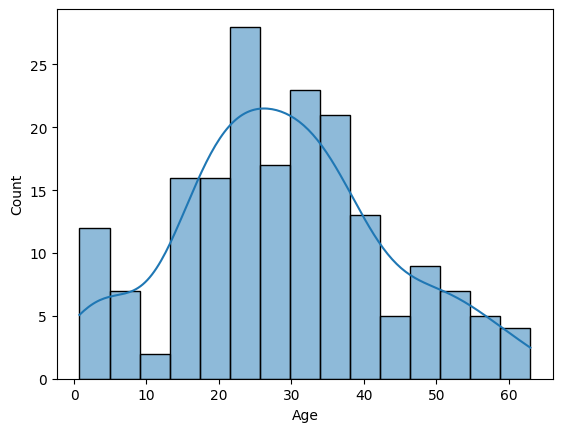

In [56]:
sns.histplot(data=df_train.loc[
        (df_train['Survived'] == 1) &
        (df_train['FareGroup'] == 'Baixa') &
        (df_train['Sex'] == 'female')
      ],
      x='Age', bins=15, kde=True)
# Sobreviventes do grupo de tarifa baixa e sexo feminino tive maior taxa de sobrevivencia

<Axes: xlabel='Age', ylabel='Count'>

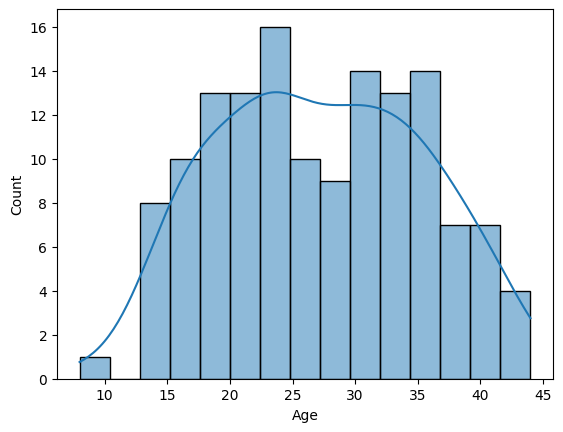

In [57]:
sns.histplot(data=df_train.loc[
        (df_train['Survived'] == 1) &
        (df_train['FareGroup'] == 'Baixa') &
        (df_train['Sex'] == 'female') &
        (df_train['Age'] > 7) &
        (df_train['Age'] < 45)
      ],
      x='Age', bins=15, kde=True)

In [58]:
df_train.loc[
        (df_train['Survived'] == 1) &
        (df_train['FareGroup'] == 'Baixa') &
        (df_train['Sex'] == 'female') &
        (df_train['Age'] > 7) &
        (df_train['Age'] < 45)
      ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sobreviveu,FareGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Baixa
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Baixa
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Baixa
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,Baixa
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1,Baixa
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1,Baixa
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1,Baixa
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1,Baixa


In [ ]:
survival_percentage_by_class = train_data.groupby('Pclass')['Survived'].mean() * 100

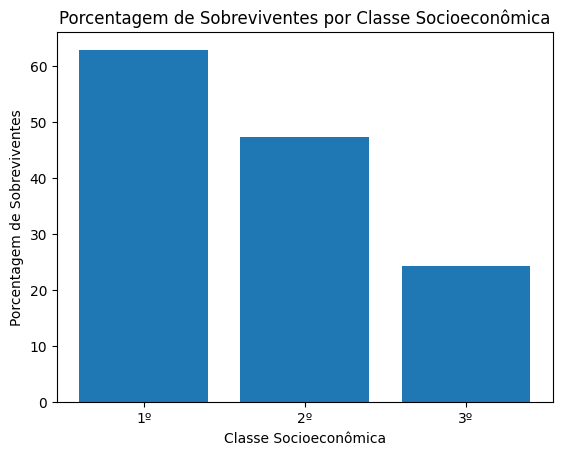

In [ ]:
plt.bar(survival_percentage_by_class.index, survival_percentage_by_class.values)
plt.title('Porcentagem de Sobreviventes por Classe Socioeconômica')
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Porcentagem de Sobreviventes')
plt.xticks([1.0, 2.0, 3.0], ['1º', '2º', '3º'])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

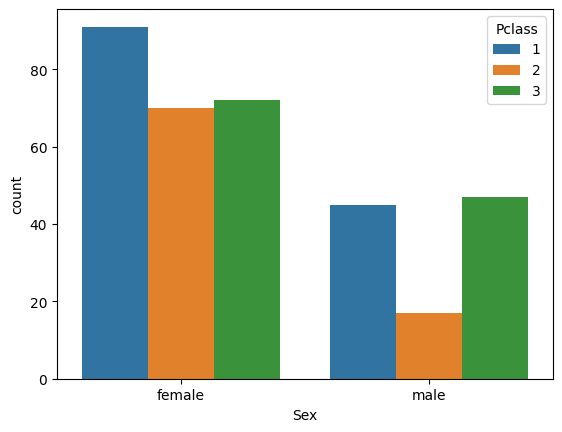

In [22]:
sns.countplot(data=df_train.loc[df_train['Survived'] == 1] , x='Sex', hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

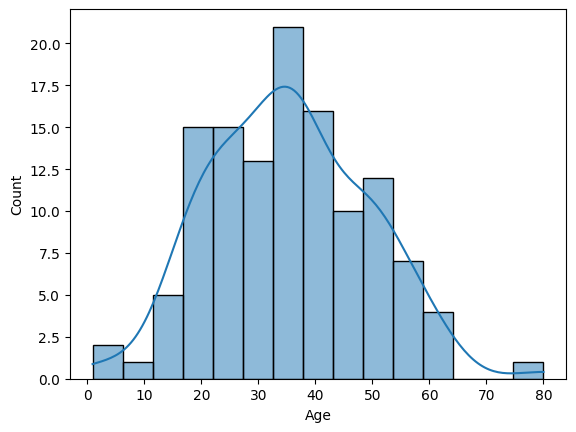

In [23]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True,)
## Idade das pessoas da Classe 1 que sobreviveram

<Axes: xlabel='Age', ylabel='Count'>

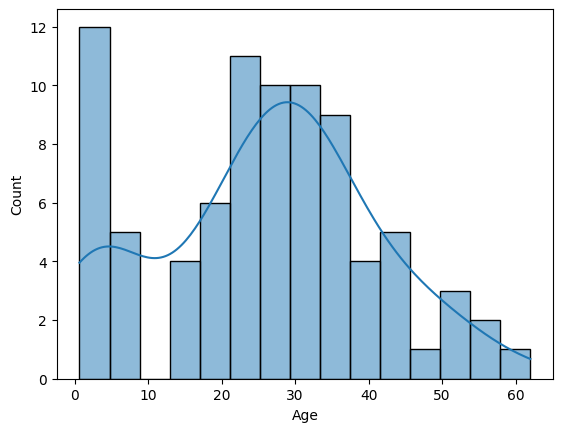

In [24]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True,)
## Idade das pessoas da Classe 2 que sobreviveram

<Axes: xlabel='Age', ylabel='Count'>

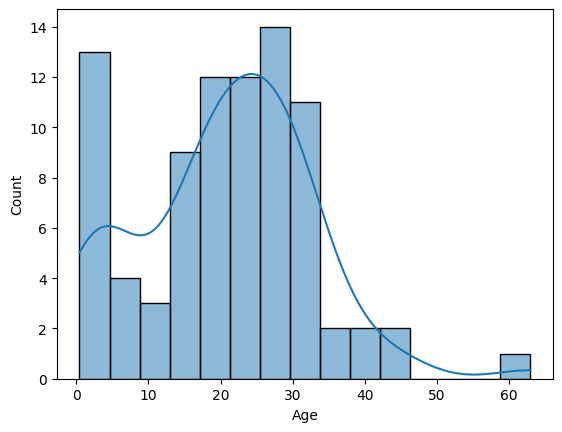

In [26]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True,)
## Idade das pessoas da Classe 3 que sobreviveram

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

**Treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split

# Carregar os dados de treinamento
train_data = pd.read_csv('/content/train.csv')

# Selecionar as colunas de interesse
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Survived']
train_data = train_data[features]

# Dividir os dados em conjuntos de treinamento e teste
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Verificar as informações sobre os conjuntos de dados
print("Tamanho do conjunto de treinamento:", len(train_set))
print("Tamanho do conjunto de teste:", len(test_set))


Tamanho do conjunto de treinamento: 712
Tamanho do conjunto de teste: 179


**Criação de modelo**

**Validação cruzada e ajuste de hiperparâmetros**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Carregar os dados de treinamento
train_data = pd.read_csv('train.csv')

# Selecionar as colunas de interesse
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Survived']
train_data = train_data[features]

# Dividir os dados em conjuntos de treinamento e teste
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o pipeline de pré-processamento
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_features = ['Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

# Criar o pipeline completo com o modelo de classificação
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Realizar validação cruzada
scores = cross_val_score(pipeline, X, y, cv=5)

# Calcular a precisão média da validação cruzada
mean_accuracy = scores.mean()
print("Precisão média da validação cruzada:", mean_accuracy)

# Ajustar hiperparâmetros
parameters = {'classifier__max_depth': [2, 5, 10],
              'classifier__min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)



Precisão média da validação cruzada: 0.7744837110037035
Melhores hiperparâmetros: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}


In [27]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")


X = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_train['Survived']


X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-27-602d23206103>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-27-602d23206103>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)
arvoreDecisao = DecisionTreeClassifier()
arvoreDecisao.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = arvoreDecisao.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [30]:
df_train['Sobreviveu'] = y_pred
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [31]:
df_train['Sobreviveu'].value_counts()

0    561
1    330
Name: Sobreviveu, dtype: int64

In [32]:
accuracy = accuracy_score(y, y_pred) * 100
accuracy

97.97979797979798

In [33]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
X = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_train['Survived']
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-33-4f8f9e0479df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-33-4f8f9e0479df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = randomForest.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [36]:
df_train['Sobreviveu'] = y_pred
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [37]:
df_train['Sobreviveu'].value_counts()

0    550
1    341
Name: Sobreviveu, dtype: int64

In [38]:
accuracy = accuracy_score(y, y_pred) * 100
accuracy

97.8675645342312

In [39]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
X = df_train[['Age', 'Sex', 'Fare','Pclass']]
y = df_train['Survived']
X.isnull().value_counts()

Age    Sex    Fare   Pclass
False  False  False  False     714
True   False  False  False     177
dtype: int64

In [40]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1}) # Tratamento de Dados
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-40-7c83baf46b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1}) # Tratamento de Dados
<ipython-input-40-7c83baf46b57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressao_linear = LogisticRegression()
regressao_linear.fit(X, y)

LogisticRegression()

In [42]:
y_pred = regressao_linear.predict(X)
df_train['Sobreviveu'] = y_pred
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,1
889,890,1


In [43]:
df_train['Sobreviveu'].value_counts()

0    567
1    324
Name: Sobreviveu, dtype: int64

In [44]:
accuracy = accuracy_score(y, y_pred) * 100
accuracy


80.02244668911335

In [45]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sobreviveu
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Informações sobre os sobreviventes do sexo masculino
Previsão :

*   Sobrevivencia: 24 pessoas
*   Média Idade: 22
*   Idade mais Alta: 36 anos
*   Idade mais baixa: 0.92 anos



In [46]:
df_train.loc[(df_train['Sex'] == 'male') & (df_train['Sobreviveu'] == 1)].describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,24.000000,24.000000,24.0,22.000000,24.000000,24.000000,24.000000,24.0
mean,454.208333,0.541667,1.0,22.087273,0.458333,0.666667,149.865625,1.0
std,261.100344,0.508977,0.0,8.432361,0.721060,0.868115,131.282663,0.0
min,28.000000,0.000000,1.0,0.920000,0.000000,0.000000,30.000000,1.0
25%,264.500000,0.000000,1.0,19.000000,0.000000,0.000000,73.386475,1.0
50%,495.500000,1.000000,1.0,24.000000,0.000000,0.000000,99.989600,1.0
75%,680.500000,1.000000,1.0,27.000000,1.000000,1.250000,214.069800,1.0
max,890.000000,1.000000,1.0,36.000000,3.000000,2.000000,512.329200,1.0


**Informação sobre os sobreviventes do sexo Feminino:**


*   Sobrevivencia: 300 pessoas
*   Média de idade: 27 anos
*   Idade mais alta: 63 anos
*   Idade mais baixa: 0.75 anos



In [47]:
df_train.loc[(df_train['Sex'] == 'female') & (df_train['Sobreviveu'] == 1)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,300.000000,300.000000,300.000000,247.000000,300.000000,300.000000,300.000000,300.0
mean,431.800000,0.770000,2.120000,27.024291,0.703333,0.560000,45.468154,1.0
std,256.481518,0.421536,0.857156,13.902788,1.177544,0.817697,59.094884,0.0
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,1.0
25%,233.250000,1.000000,1.000000,18.000000,0.000000,0.000000,12.215625,1.0
50%,414.500000,1.000000,2.000000,26.000000,0.000000,0.000000,23.000000,1.0
75%,642.250000,1.000000,3.000000,35.000000,1.000000,1.000000,57.244800,1.0
max,889.000000,1.000000,3.000000,63.000000,8.000000,4.000000,512.329200,1.0
